In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate,  GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [154]:
data = pd.read_csv(r"diabetes.csv")
print(data.columns)
data.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [155]:
data.shape

(768, 9)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [157]:
df=data.describe().T

In [158]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [153]:
#sns.scatterplot(data=data, x=data['Pregnancies'], y=data['BloodPressure'], hue=data['Outcome'])

In [152]:
#sns.scatterplot(data=data, x=data['Glucose'], y=data['Insulin'], hue=data['Outcome'])

In [166]:
print((data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]== 0).sum())
print((data== 0).sum())
#data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.nan)
#data.info()
#data.isna().count

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Glucose      5
Insulin    374
dtype: int64
0.581


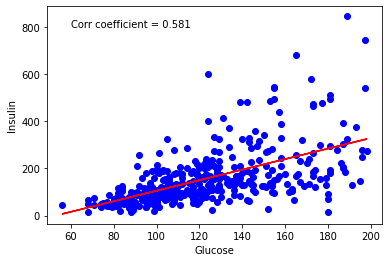

In [173]:
data2 = data[["Glucose","Insulin"]]
#data2.head()
#data.info()
print((data2==0).sum())
data2 = data2.replace( 0,np.nan)
data2 = data2.dropna()
data2.shape
x = data2["Glucose"]
y = data2["Insulin"]
plt.plot(x, y,'o', color='blue')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
p_r = np.round(x.corr(y),3)
print(p_r)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.text(60,800,"Corr coefficient = 0.581")
correlation_df = data2.corr()

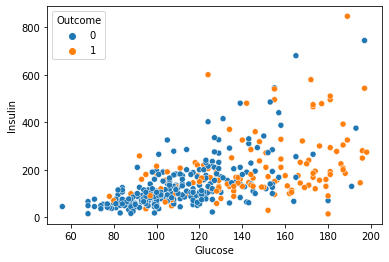

In [174]:
sns.scatterplot(data=data2, x=data2['Glucose'], y=data2['Insulin'], hue=data['Outcome'])

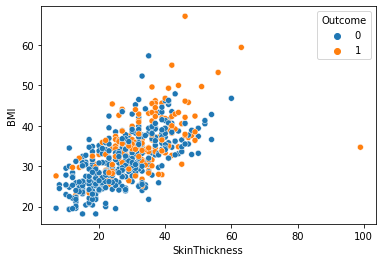

In [176]:
data3 = data[["SkinThickness","BMI"]]
data3 = data3.replace( 0,np.nan)
data3 = data3.dropna()
data3.shape
sns.scatterplot(data=data, x=data3['SkinThickness'], y=data3['BMI'], hue=data['Outcome'])

0.648


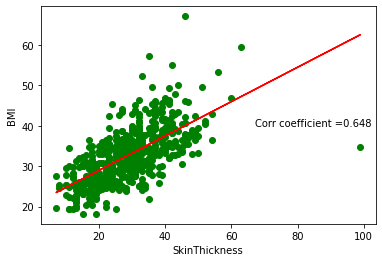

In [181]:
x=data3['SkinThickness']
y=data3['BMI']
plt.plot(x, y,'o', color='green')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.text (67, 40, "Corr coefficient =0.648")
p_r = np.round(x.corr(y),3)
print(p_r)

In [182]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [183]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [184]:
x.shape, y.shape

((768, 8), (768,))

In [185]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10) 

In [264]:
svc = SVC(C=10) # No hyperparameter given means it will use default values (i.e. - C = 1.0 and kernel = 'rbf')
svc.fit(X_train, y_train)

SVC(C=10)

In [265]:
svc.score(X_train,y_train)
scores = cross_validate(svc, x, y, scoring=['accuracy', 'precision', 'recall', 'f1'],cv =5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.760470
test_precision    0.716238
test_recall       0.526415
test_f1           0.604753
dtype: float64

0.7604166666666666

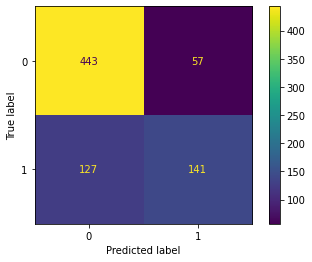

In [267]:
y_pred = cross_val_predict(svc, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
precision_score(y,y_pred)
accuracy_score(y,y_pred)

0.7077922077922078

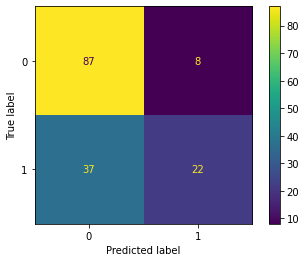

In [232]:
prediction = svc.predict(X_test)
cm = confusion_matrix(y_test, prediction, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy_score(y_test,prediction)

In [268]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
parameters = {'n_estimators':[10,50,100,150,200]}
#grid_rf = GridSearchCV(rf, parameters)
#grid_rf.fit(X_train, y_train)

In [269]:
#print(rf.score(X_train,y_train))
scores = cross_validate(rf, x, y, scoring=['accuracy', 'precision', 'recall', 'f1'],cv =5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.765716
test_precision    0.708403
test_recall       0.571139
test_f1           0.629639
dtype: float64

0.765625

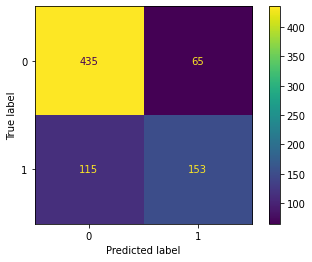

In [236]:
y_pred = cross_val_predict(rf, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
precision_score(y,y_pred)
accuracy_score(y,y_pred)

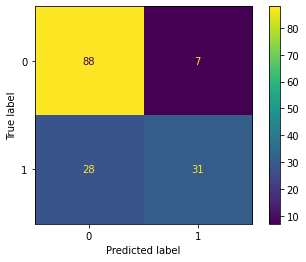

In [238]:
prediction = rf.predict(X_test)
cm = confusion_matrix(y_test, prediction, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [270]:
lr = clf = LogisticRegression(random_state=10)
#lr.fit(X_train, y_train)

In [271]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
x1 = scaled_data.drop('Outcome',axis=1)
y1 = scaled_data['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=10) 


In [273]:
scores = cross_validate(lr, x1, y1, scoring=['accuracy', 'precision', 'recall', 'f1'], cv =2)
df_scores = pd.DataFrame(scores)
print(df_scores)
df_scores.mean()[2:]

   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.010609    0.005777       0.734375        0.681818     0.447761  0.540541
1  0.006311    0.005633       0.778646        0.795181     0.492537  0.608295


test_accuracy     0.756510
test_precision    0.738499
test_recall       0.470149
test_f1           0.574418
dtype: float64

0.7565104166666666

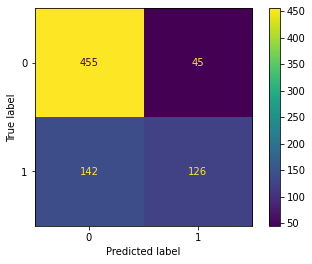

In [274]:
y_pred = cross_val_predict(lr, x1, y1, cv=2)
conf_mat = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
precision_score(y1,y_pred)
accuracy_score(y1,y_pred)

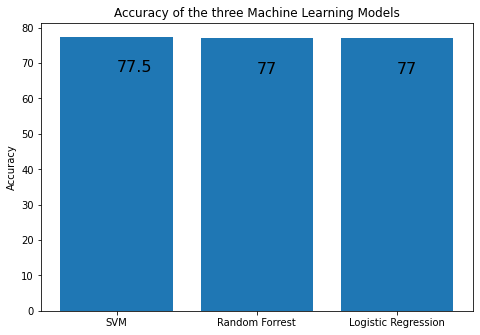

In [ ]:
fig = plt.figure()
X = ['SVM', 'Random Forrest', 'Logistic Regression']
Y = [77.5, 77, 77]
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y, width = 0.8)
for i in range(len(X)):
  plt.text(X[i],Y[i]-10,Y[i],fontsize=16, c= 'k')
plt.ylabel("Accuracy")
plt.title("Accuracy of the three Machine Learning Models")
fig.savefig( "test.png")
plt.show()

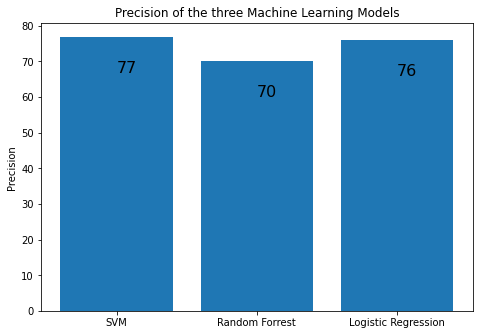

In [ ]:
fig = plt.figure()
X = ['SVM', 'Random Forrest', 'Logistic Regression']
Y = [77, 70, 76]
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y, width = 0.8)
for i in range(len(X)):
  plt.text(X[i],Y[i]-10,Y[i],fontsize=16, c= 'k')
plt.ylabel("Precision")
plt.title("Precision of the three Machine Learning Models")
plt.show()

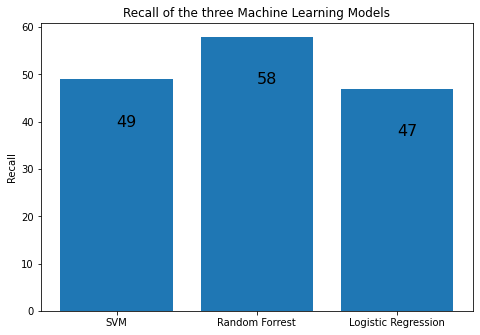

In [ ]:
fig = plt.figure()
X = ['SVM', 'Random Forrest', 'Logistic Regression']
Y = [49, 58, 47]
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y, width = 0.8)
for i in range(len(X)):
  plt.text(X[i],Y[i]-10,Y[i],fontsize=16, c= 'k')
plt.ylabel("Recall")
plt.title("Recall of the three Machine Learning Models")
plt.show()

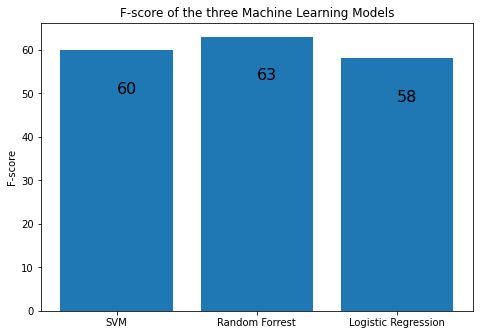

In [ ]:
fig = plt.figure()
X = ['SVM', 'Random Forrest', 'Logistic Regression']
Y = [60, 63, 58]
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y, width = 0.8)
for i in range(len(X)):
  plt.text(X[i],Y[i]-10,Y[i],fontsize=16, c= 'k')
plt.ylabel("F-score")
plt.title("F-score of the three Machine Learning Models")
plt.show()